test page for lstm method.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

from data_util import generate_toy_data_for_lstm
from model import rnn_model

Using TensorFlow backend.


### steps
1. generate toy data for prediction
2. change f_horizon value to see results

In [8]:
def moving_f_horizons(f_horizons):
    '''
    Check the relationship between f_horizon and the behavior.
    Parameters must match.
    '''
    y_tests = []
    y_preds = []
    Losses = []
    for f_horizon in f_horizons:    
        X_batches, y_batches, X_test, y_test = generate_toy_data_for_lstm(num_periods = 120, f_horizon = f_horizon, samples = 10009)
        print(X_test.shape)
        print("f_horizon is %d." %f_horizon)
        losses, y_pred = rnn_model(X_batches, y_batches, X_test, y_test, cell="BasicRNNCell", 
                  learning_rate=0.001, epochs=500, print_every=100, 
                  inputs=1, outputs=1, hidden=100, num_periods=120)
        y_tests.append(y_test)
        y_preds.append(y_pred)
        Losses.append(losses)
        
    return Losses, y_tests, y_preds

length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 1.
0   MSE: 1.92399e+06
100   MSE: 11458.5
200   MSE: 7157.33
300   MSE: 4429.37
400   MSE: 2974.11
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 2.
0   MSE: 2.00485e+06
100   MSE: 11744.8
200   MSE: 6078.19
300   MSE: 2235.8
400   MSE: 376.379
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 3.
0   MSE: 1.54172e+06
100   MSE: 10302.7
200   MSE: 5362.29
300   MSE: 2325.52
400   MSE: 699.875
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 4.
0   MSE: 1.53855e+06
100   MSE: 13208.4
200   MSE: 7728.76
300   MSE: 5431.77
400   MSE: 3608.69
length of training data x :  (9960,)
length of traini

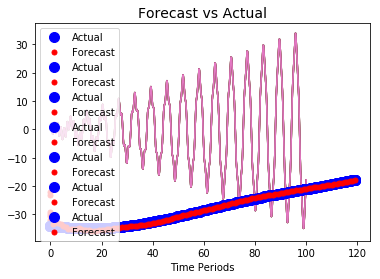

In [9]:
f_horizons = [1,2,3,4,5,8,10]
Losses, y_tests, y_preds = moving_f_horizons(f_horizons)

In [36]:
f_horizons = [1,2,3,4,5,8,10]

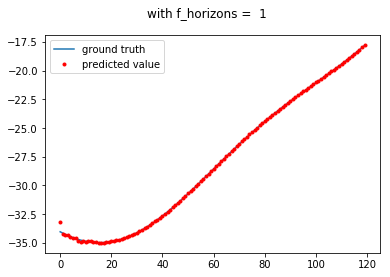

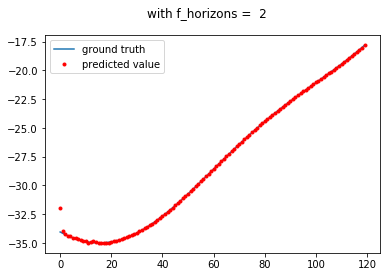

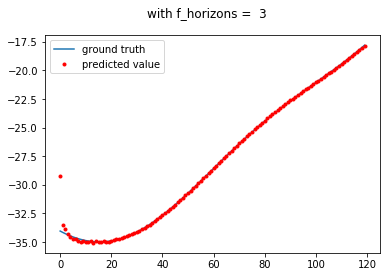

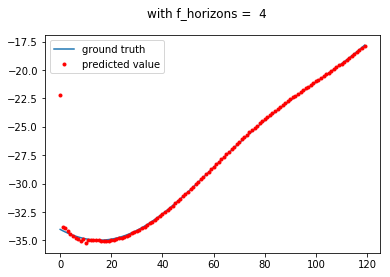

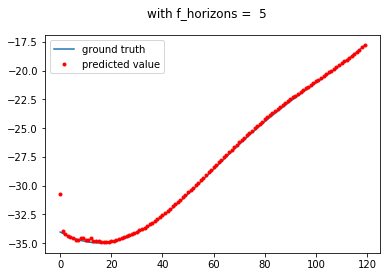

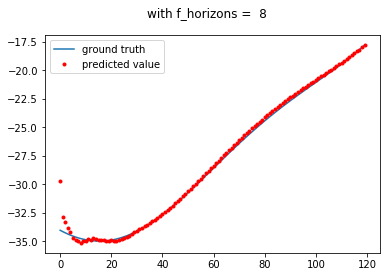

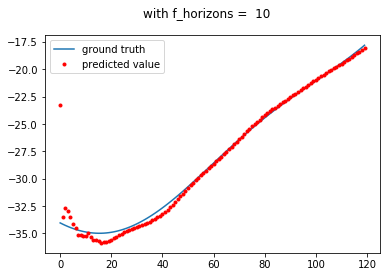

In [51]:
for i in range(len(Losses)):
    
    y_test = np.squeeze(y_tests[i])
    y_pred = np.squeeze(y_preds[i])
    
    fig, ax=plt.subplots(1, 1)
    
    x = range(len(y_test))
    
    f_horizon = f_horizons[i]
    fig.suptitle('with f_horizons =  %i' %(f_horizon));
      
    # p = plt.subplot(num)
    ax.plot(x, y_test, label="ground truth")
    ax.plot(x, y_pred, 'r.', label="predicted value")
    ax.legend()

# Results
- f_horizon 可以取不同的值，随着该值越来越大，也就是预测越来越远的未来，模型的表现就越差

# ChangeLog
- 20180414 v0